In [1]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
# df.head()
df_interest = df.loc[
    df['Country/Region'].isin(['China', 'United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
# df_interest.rename(
#     index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)
df_interest = df_interest.set_index('Country/Region')
# df_interest.head()
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(axis=1)]
df1.index = pd.to_datetime(df1.index)
df1.head()

Country/Region,Germany,Italy,United Kingdom,US
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0


In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


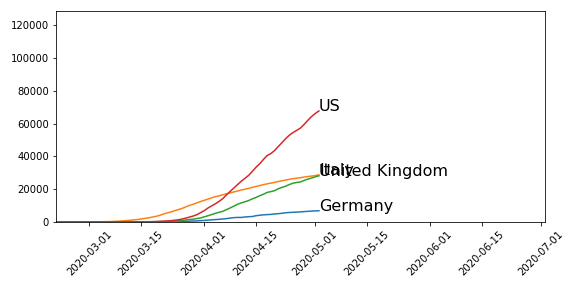

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(0, 128740)

(737476.0, 737608.0)

In [75]:
from matplotlib import animation as ani
from datetime import datetime

def convert_text(x, y, countries, idx):
    px, py, text = 0, 0, ''
    if x.shape[0] > 0:
        px, py = x, y
        px = x[-1]
        px = date.toordinal(px)
    #     px = np.random.randint(737476, 737550)
        py = y[-1]
#         py = np.random.randint(0, 100000)
        text = countries[idx]
        print(px, py, text)
    return px, py, text

def update(num, lines):
    x, y = df1.index[:num], df1.values[:num]
    countries = df1.columns
    for idx, line in enumerate(lines):
        y_line = y[:, idx]
        line.set_data(x, y_line)
        px, py, text_ = convert_text(x, y_line, countries, idx)
        eval(f"text{idx}.set_text(text_)")
        eval(f"text{idx}.set_position((px, py))")

x, y = df1.index[:2], df1.values[:2]
fig = plt.figure(figsize=(8, 4), tight_layout=True)
plt.xticks(rotation=45)
ax = plt.gca()
lines = plt.plot(x, y)
ax.set_ylim(df1.values.min(), df1.values.max())
ax.set_xlim(df1.index.min(), df1.index.max())
text0 = plt.text(x[0], 20000, 'test', fontsize=16)
text1 = plt.text(x[0], 30000, '', fontsize=16)
text2 = plt.text(x[0], 40000, '', fontsize=16)
text3 = plt.text(x[0], 50000, '', fontsize=16)
ani = ani.FuncAnimation(fig, func=update, fargs=(lines,), frames=len(df1), interval=100, blit=True)
plt.show()

<IPython.core.display.Javascript object>


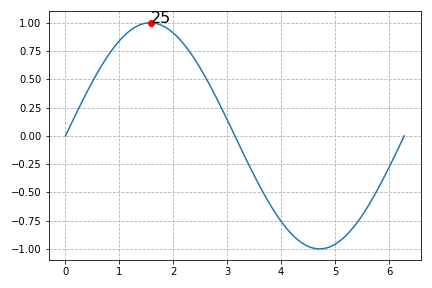

737541 5976 

In [77]:
from matplotlib import animation as ani
def update_points(num):
    '''
    更新数据点
    '''
    
    point_ani.set_data(x[num], y[num])
    text_ani.set_text(f"{num}")
    text_ani.set_position((x[num], y[num]))
#     return point_ani, text_ani,
 
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
fig = plt.figure(tight_layout=True)
plt.plot(x,y)
point_ani, = plt.plot(x[0], y[0], "ro")
text_ani = plt.text(x[0], y[0], '', fontsize=16)
plt.grid(ls="--")
# 开始制作动画
ani = ani.FuncAnimation(fig, update_points, np.arange(0, 100), interval=1000, blit=True)
 
# ani.save('sin_test2.gif', writer='imagemagick', fps=10)
plt.show()